<h2>Team Members</h2>
<h5>Anish Singh 001388384</h5>
<h5>Isha Madan 001393098</h5>
<h5>Neel Shah 001029882 </h5>
<h5>Vardhana Bhatt 001064528</h5>


<h1>Credit Card Fraud Detection</h1> 



Detecting fraud transactions is of great importance for any credit card company. 

Credit card fraud detection is a typical classification problem and we have tried to focus on analyzing, pre processing and deployment of multiple algorithms.

The goal is to build a classifier that tells if a transaction is a fraud or not.

<img src ="images/creditcard.jpg" width ="1500" height="600"></img>

**Dataset Context¶**

*The data contains 284,807  credit card transactions with 492 fraudulent.*

*Everything except the time and amount has been reduced by a Principle Component Analysis (PCA) for privacy concerns. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.*

*'Time' contains the seconds elapsed between each transaction.*

* 'Amount' is the transaction Amount*

* 'Class' is the response variable and it takes value 1 in case of fraud and 0

A PCA transformation, features need to be previously scaled. So features V1, V2, ... V28 have been scaled already.

**Steps for the Project**

This project will use several different machine learning algorithms. We have also done Hyperparameter tuning and calculated the accuracy for each of them.


 1: Data Exploration

 2: Data cleaning Visualization

 3: Scaling the Dataset

 4: Decision Tree Classifier

 5: Random Forest Classifier

 6: K -Means Clustering

 6: DNN

 7: DNN with SMOTE

 8 : Conclusion

**Importing Necessary Libraries**



In [ ]:
# Getting the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier

LABELS = ["Normal", "Fraud"]
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from imblearn.over_sampling import SMOTE
from collections import Counter

**Getting the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Reading the CSV file
data = pd.read_csv('/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# To Check the shape of the data
data.shape

(284807, 31)

In [ ]:
# To get some insight about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:

data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


**Exploratory Data Analysis**

In [ ]:
# To check if the data contains Null values or Not
data.isnull().values.any()

False

**Trying to observe how the distrubution of the Data looks like**

Text(0, 0.5, 'Frequency')

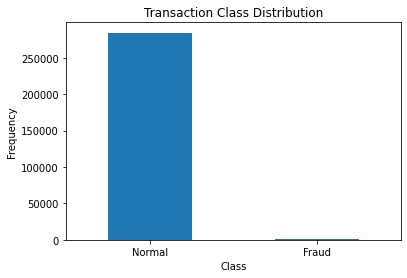

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset 
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


There are 492 Fruad Transaction and 284315 Normal Transaction

**Analyzed some more information from the transaction data**

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Summary:**

*The mean transaction amout among fraud cases is 122 USD, and is 88 among non-fraud cases. And the difference is statistically significant. bold text*

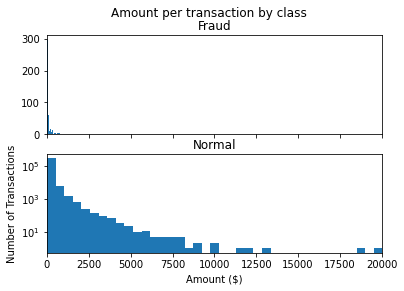

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

**Checked how fraudulent transactions occur more often during certain time frame**

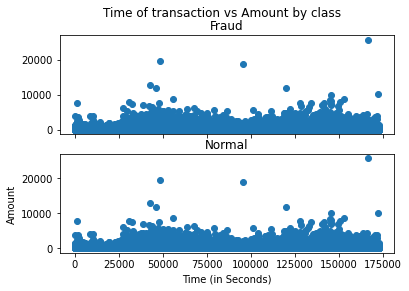

<Figure size 5760x5760 with 0 Axes>

In [ ]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(data.Time, data.Amount)
ax1.set_title('Fraud')
ax2.scatter(data.Time, data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.figure(figsize=(80,80))
plt.show()

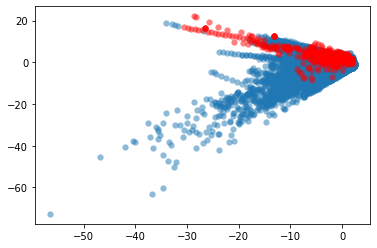

In [ ]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(data.loc[data['Class'] == 0]['V1'], data.loc[data['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(data.loc[data['Class'] == 1]['V1'], data.loc[data['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

**Tried to check how amount and time are related to each other**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


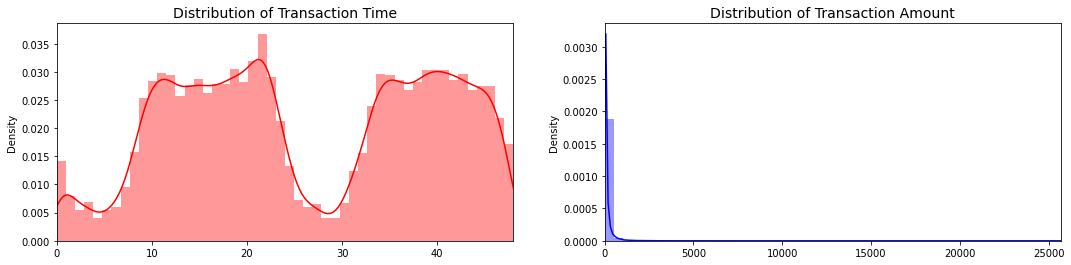

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(data['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(data['Time'].values/(60*60)), max(data['Time'].values/(60*60))])

sns.distplot(data['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(data['Amount'].values), max(data['Amount'].values)])

plt.show()

**Summary:**

Time: Most transactions happended in day time.

We should better scale these two skewed features.

**Transaction Hour**

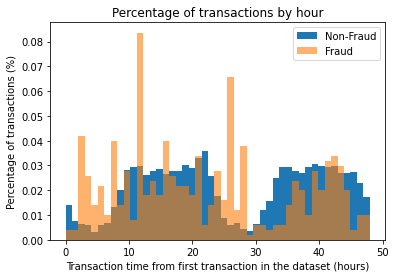

In [ ]:
# Plot of transactions in 48 hours
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((normal.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist((fraud.Time/(60*60)), bins, alpha=0.6,density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

**Checked the corelation between the Datasets**

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

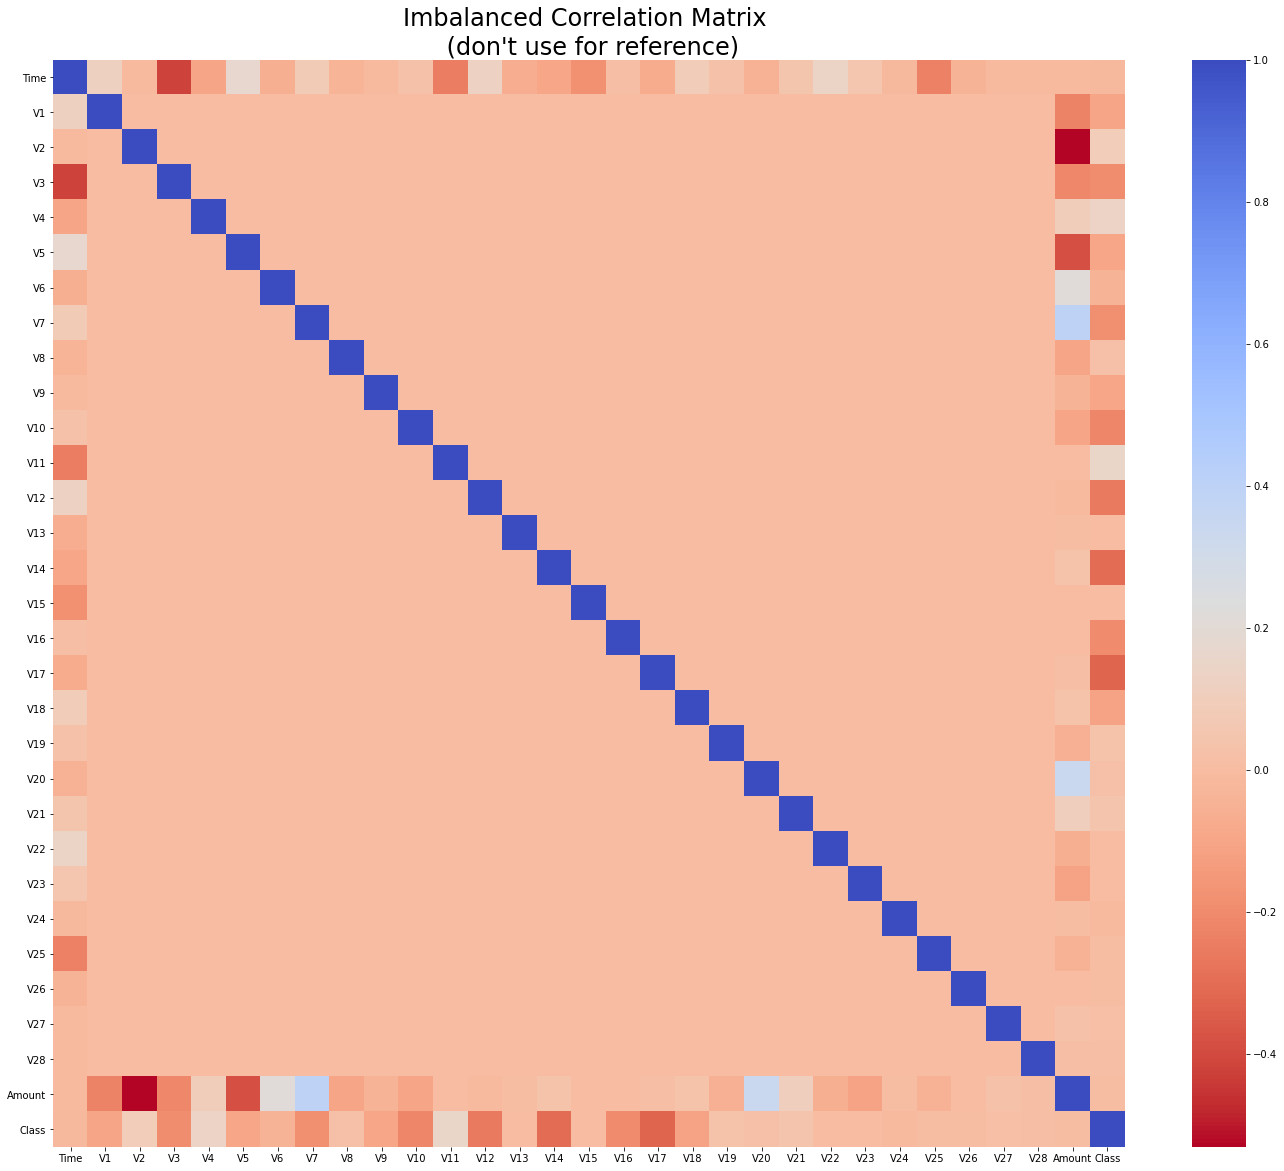

In [ ]:
# Calculate pearson correlation coefficience
corr = data.corr() 

# Plot heatmap of correlation
f, ax = plt.subplots(1, 1, figsize=(24,20))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=24)

**We can observe that there is no Major corelation between Column**

**Scale data**



Here we are Scaling the amount columm: 



In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
scaler = StandardScaler()
df=data
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Amount'], inplace=True, axis = 1)

In [ ]:
df.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686


**Split data**

In [ ]:
df.drop(['Time'], inplace=True, axis = 1)

In [ ]:
y = data['Class']
X = data.drop(['Class'], axis = 1)

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((199364, 29), (85443, 29))

 **Decision Tree**

Fit model

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Evaluate model**

In [ ]:
y_pred = decision_tree_model.predict(X_test)

In [ ]:
decision_tree_model.score(X_test, y_test)

0.999204147794436

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:

cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85267    29]
 [   39   108]]


In [ ]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.999204147794436
0.7883211678832117
0.7346938775510204
0.7605633802816901


Confusion matrix, without normalization


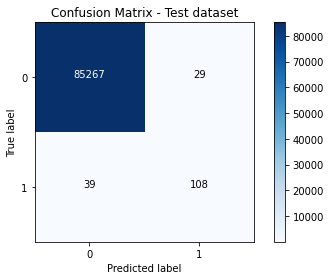

In [ ]:
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

**Tried to tune some hyperparameters using the GridSearchCV algorithm.**

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,5,1),
    
    
    
}

In [ ]:
# clf in name of the model n_jobs=-1 (it takes all the powers of CPU)
grid_search = GridSearchCV(estimator=decision_tree_model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 4}


In [ ]:
grid_search.best_score_

0.9993328786292143

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =4, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
clf.score(X_test, y_test)

0.99916903666772

**This shows that how Grid Search CV is Usefull for Choosing the right parameters**

**Random Forest modelling**

Fit model

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Evaluate model**

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:

rf_model.score(X_test, y_test)

0.9995201479348805

In [ ]:
cm1 = confusion_matrix( y_test, y_pred.round())
print(cm1)

[[85289     7]
 [   34   113]]


Confusion matrix, without normalization


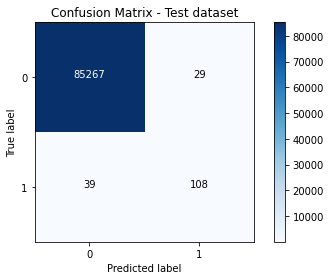

In [ ]:
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

In [ ]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9995201479348805
0.9416666666666667
0.7687074829931972
0.846441947565543


** K-Means Clustering  **

In [ ]:
# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset
features_train = train.drop(['Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

In [ ]:
# Get the arrays of features and labels in test dataset
features_test = test.drop(['Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

In [ ]:
# Normalize the features in both train and test dataset
from sklearn.preprocessing import normalize
features_train = normalize(features_train)
features_test = normalize(features_test)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))
c=confusion_matrix(labels_test,labels_test_predicted)
# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[45278 40018]
 [  121    26]]
kmeans_precison_score: 0.0006492857856358007
kmeans_recall_score: 0.17687074829931973
kmeans_accuracy_score: 0.5302248282480718
kmeans_f1_score: 0.0012938219999502375


Confusion matrix, without normalization


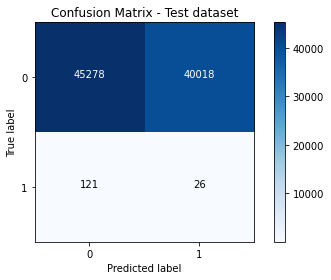

In [ ]:
plot_confusion_matrix(c, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

We will use Elbow Method to find the best value of K

In [ ]:
'''1. Elbow method'''

# Fit KMeans and calculate SSE for each *k*
ss_error = {}
for k in range(1, 20):
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(df)
    ss_error[k] = k_means.inertia_

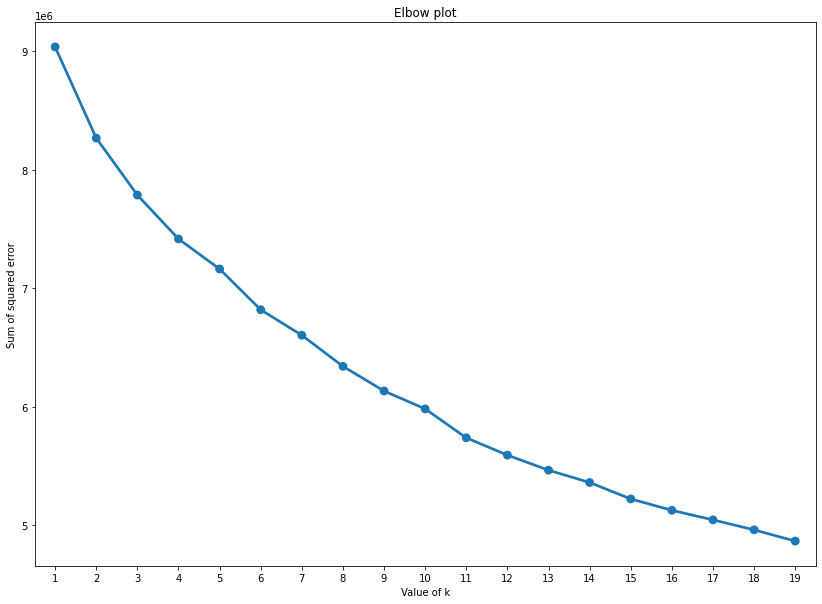

In [ ]:
# Make elbow plot
plt.figure(figsize = (14,10))
plt.title('Elbow plot')
plt.xlabel('Value of k')
plt.ylabel('Sum of squared error')
sns.pointplot(x=list(ss_error.keys()), y=list(ss_error.values()))

We will selecct k=16 as the curve start becomming stable from there 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters=16,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)




**Lets check Silhoutte score at different values of K**

**Deep neural network**

**Create model**

In [ ]:

model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

**Fit model**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 2/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 6/50
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 7/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 8/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 9/50
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 10/50
13291/13291 [==============================

In [ ]:
history.history

{'accuracy': [0.9981290698051453,
  0.9993329048156738,
  0.9993228316307068,
  0.9993830323219299,
  0.9993880391120911,
  0.9993880391120911,
  0.9993981122970581,
  0.9993930459022522,
  0.9994081258773804,
  0.9993880391120911,
  0.9993930459022522,
  0.9994031190872192,
  0.9994131326675415,
  0.9994382262229919,
  0.9994181394577026,
  0.9994181394577026,
  0.9994081258773804,
  0.9993981122970581,
  0.9994131326675415,
  0.9993930459022522,
  0.9993880391120911,
  0.9993880391120911,
  0.9994031190872192,
  0.9994382262229919,
  0.9993981122970581,
  0.9994081258773804,
  0.9993178248405457,
  0.9993780255317688,
  0.9994281530380249,
  0.9994031190872192,
  0.9994031190872192,
  0.9993028044700623,
  0.9993329048156738,
  0.9993880391120911,
  0.9993278384208679,
  0.9993629455566406,
  0.9993680119514465,
  0.9993329048156738,
  0.9993880391120911,
  0.9994131326675415,
  0.9993579387664795,
  0.9993429183959961,
  0.9994231462478638,
  0.9994231462478638,
  0.9993680119514465

**Model Evaluation**

In [ ]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0088 - accuracy: 0.9993
[0.00878913514316082, 0.9992509484291077]


In [ ]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


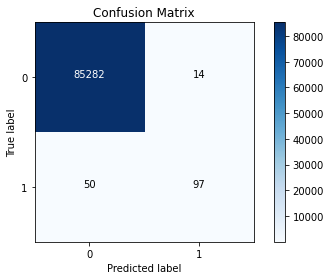

In [ ]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9992509626300574
0.8738738738738738
0.6598639455782312
0.7519379844961239


**SMOTE & Model test**

In [ ]:

X_resample, y_resample = SMOTE().fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_resample.shape

(568630, 29)

In [ ]:
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

**Model test**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 10)

Epoch 1/10
26537/26537 [==============================] - 63s 2ms/step - loss: 0.0367 - accuracy: 0.9870
Epoch 2/10
26537/26537 [==============================] - 63s 2ms/step - loss: 0.0158 - accuracy: 0.9961
Epoch 3/10
26537/26537 [==============================] - 63s 2ms/step - loss: 0.0132 - accuracy: 0.9968
Epoch 4/10
26537/26537 [==============================] - 62s 2ms/step - loss: 0.0119 - accuracy: 0.9972
Epoch 5/10
26537/26537 [==============================] - 62s 2ms/step - loss: 0.0107 - accuracy: 0.9975
Epoch 6/10
26537/26537 [==============================] - 62s 2ms/step - loss: 0.0104 - accuracy: 0.9976
Epoch 7/10
26537/26537 [==============================] - 63s 2ms/step - loss: 0.0112 - accuracy: 0.9977
Epoch 8/10
26537/26537 [==============================] - 63s 2ms/step - loss: 0.0105 - accuracy: 0.9979
Epoch 9/10
26537/26537 [==============================] - 62s 2ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 10/10
26537/26537 [==============================

In [ ]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization


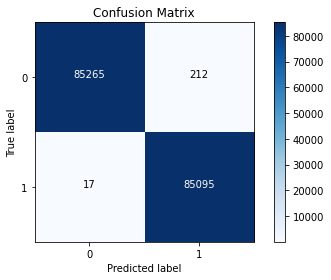

In [ ]:
y_expect = pd.DataFrame(y_test)
cm = confusion_matrix(y_expect, y_pred.round())
plot_confusion_matrix(cm, classes = (0, 1))
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9986575922245866
0.997514858100742
0.9998002631826299
0.9986562531173167


**Conclusion** :

**As a summary, we created 5 models, Decision Tree, Random Forest, Kmeans, DNN, DNN with SMOTE. As shown in the Table below, DNN with SMOTE shows better precision and F1 score.**

<table style="width:100%">
  <tr>
    <th>Algorithm </th>
    <th>Precision %</th> 
    <th>Recall %</th>
    <th>F1 %</th>
  </tr>
  
  <tr>
    <td>Decision Tree</td>
    <td>79 %</td>
    <td>76 % </td>
    <td>77 % </td>
  </tr>
  <tr>
    <td>Random Forest </td>
    <td>95 % </td>
    <td>78 % </td>
    <td>86 % </td>
  </tr>
  <tr>
    <td>K-Means</td>
    <td>64 %</td>
    <td>17 % </td>
    <td>53 % </td>
  </tr>
  <tr>
    <td>DNN</td>
    <td>85 % </td>
    <td>62 % </td>
    <td>72 % </td>
  </tr>
  <tr>
    <td>DNN with SMOTE </td>
    <td>99% </td>
    <td>99% </td>
    <td>99% </td>
  </tr>
</table>

*Hence, we will choose DNN with SMOTE as it performs the best.* 
---

